In [85]:
#################################################################################
# Нейронные сети. Аппроксимация функции.                                        #
# Написать программу для обучения и тестирования нейронной сети приближающей    #
# значения заданной многомерной функции. Проверить качество нейронной сети на   #
# тестовой выборке (описать какими критериями пользовались).                    #
#################################################################################

# Импортируем нужные библиотеки
import numpy as np
import copy
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers

# Инициализация генератора случайных чисел
RANDOM_STATE = 4

# Размер тренировочной выборки
TRAIN_SIZE = 0.6

# Количество итераций обучения и кол-во примеров в группе
N_EPOCHS = 60
BATCH_SIZE = 10

# Пример одномерной функции 1 -> 1
def f11_1(x):
    return [-(x[0]) * (x[0]) + 5]

# Пример одномерной функции 1 -> 1
def f11_2(x):
    return [math.sin(x[0]) + 1]

# Пример одномерной функции 1 -> 1
def f11_3(x):
    return [math.sqrt(x[0])]

# Пример двумерной функции 2 -> 1
def f21_1(x):
    return [x[0] + x[1]]

# Пример двумерного отображения 2 -> 2
def f22_1(x):
    return [x[0] + x[1], x[1] * x[1] * x[0]]

# Сторит обучающую выборку для n-мерной функции
def createDotSet(f, dim, start, step, dotNumber):
    data = []
    target = []
    curDot = copy.deepcopy(start)
    dataSize = 1
    
    # Количество точек в пространстве, где рассчитываем значение f
    for i in range(dim):
        dataSize *= dotNumber[i];
    
    # Записываем точки и значения функции в этих точках
    for num in range(dataSize):
        numReduced = num
        for i in range(dim):
            curDot[i] = start[i] + step[i] * (numReduced % dotNumber[i])
            numReduced //= dotNumber[i]
        data.append(copy.deepcopy(curDot))
        target.append(f(curDot))
    return data, target

# Создаем обучающую и проверочную выборки
def createTrainTestSplit(data, train, trainSize):
     return train_test_split(data, train, train_size = trainSize, random_state = RANDOM_STATE)

# Создаем датасет точек пространства, сопоставляем им значения функции
data, target = createDotSet(f11_3, 1, [0], [0.01], [651])
#data, target = createDotSet(f21, 2, [0, 0], [0.1, 0.1], [21, 21])
#data, target = createDotSet(f22, 2, [0, 0], [0.1, 0.1], [21, 21])

# Создаем обучающую и тестировочную выборки
train_data, test_data, train_target, test_target = createTrainTestSplit(data, target, TRAIN_SIZE)

# Инициализируем слои перцептрона
inputs = keras.Input(shape=(1,))
x = layers.Dense(2000, activation='relu')(inputs)
y = layers.Dense(40, activation='relu')(x)
outputs = layers.Dense(1)(y)

# Предварительная подготовка двуслойного перцептрона
model = keras.Model(inputs=inputs, outputs=outputs, name='perceptron')
model.compile(optimizer='adam', loss='mae', metrics=['accuracy'])

# Обучение перцептрона
model.fit(train_data, train_target, epochs=N_EPOCHS, batch_size=BATCH_SIZE)

# Находим ошибку MeanAbsoluteError на тестовой выборке
mae = tf.keras.losses.MeanAbsoluteError()
print('\nMeanAbsoluteError: ', mae(test_target, model.predict(test_data)).numpy())

Epoch 1/60
39/39 [==============================] - 0s 1ms/step - loss: 0.3620 - accuracy: 0.0026
Epoch 2/60
39/39 [==============================] - 0s 1ms/step - loss: 0.1121 - accuracy: 0.0000e+00
Epoch 3/60
39/39 [==============================] - 0s 1ms/step - loss: 0.0623 - accuracy: 0.0000e+00
Epoch 4/60
39/39 [==============================] - 0s 1ms/step - loss: 0.0441 - accuracy: 0.0000e+00
Epoch 5/60
39/39 [==============================] - 0s 1ms/step - loss: 0.0475 - accuracy: 0.0000e+00
Epoch 6/60
39/39 [==============================] - 0s 1ms/step - loss: 0.0413 - accuracy: 0.0026
Epoch 7/60
39/39 [==============================] - 0s 1ms/step - loss: 0.0370 - accuracy: 0.0026
Epoch 8/60
39/39 [==============================] - 0s 1ms/step - loss: 0.0464 - accuracy: 0.0026
Epoch 9/60
39/39 [==============================] - 0s 1ms/step - loss: 0.0436 - accuracy: 0.0026
Epoch 10/60
39/39 [==============================] - 0s 1ms/step - loss: 0.0376 - accuracy: 0.0026
Epo

Epoch 1/60
26/26 [==============================] - 0s 1ms/step - loss: 0.4781 - accuracy: 0.0000e+00
Epoch 2/60
26/26 [==============================] - 0s 1ms/step - loss: 0.1665 - accuracy: 0.0019
Epoch 3/60
26/26 [==============================] - 0s 1ms/step - loss: 0.0846 - accuracy: 0.0019
Epoch 4/60
26/26 [==============================] - 0s 1ms/step - loss: 0.0667 - accuracy: 0.0019
Epoch 5/60
26/26 [==============================] - 0s 1ms/step - loss: 0.0437 - accuracy: 0.0019
Epoch 6/60
26/26 [==============================] - 0s 1ms/step - loss: 0.0361 - accuracy: 0.0019
Epoch 7/60
26/26 [==============================] - 0s 1ms/step - loss: 0.0369 - accuracy: 0.0019
Epoch 8/60
26/26 [==============================] - 0s 1ms/step - loss: 0.0465 - accuracy: 0.0019
Epoch 9/60
26/26 [==============================] - 0s 1ms/step - loss: 0.0536 - accuracy: 0.0019
Epoch 10/60
26/26 [==============================] - 0s 1ms/step - loss: 0.0279 - accuracy: 0.0019
Epoch 11/60
26/

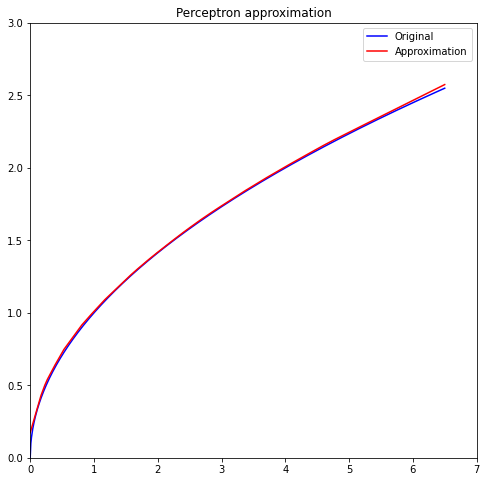

In [87]:
#################################################################################
# Нейронные сети. Аппроксимация функции.                                        #
# Написать программу для обучения и тестирования нейронной сети приближающей    #
# значения заданной многомерной функции. Проверить качество нейронной сети на   #
# тестовой выборке (описать какими критериями пользовались).                    #
#################################################################################

# Импортируем нужные библиотеки
import numpy as np
import copy
import matplotlib.pyplot as plt
import tensorflow as tf
import math
from sklearn import metrics
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers

# Инициализация генератора случайных чисел
RANDOM_STATE = 1

# Размер тренировочной выборки
TRAIN_SIZE = 0.8

# Количество итераций обучения и кол-во примеров в группе
N_EPOCHS = 60
BATCH_SIZE = 20

# Пример одномерной функции 1 -> 1
def f11_1(x):
    return [-(x[0]) * (x[0]) + 5]

# Пример одномерной функции 1 -> 1
def f11_2(x):
    return [math.sin(x[0]) + 1]

# Пример одномерной функции 1 -> 1
def f11_3(x):
    return [math.sqrt(x[0])]

# Выводит аппроксимацию функции
def drawApproximation(X, Y1, Y2):
    plt.rcParams['figure.figsize'] = [8, 8]
    plt.title('Perceptron approximation')
    plt.axis([0, 7, 0, 3])
    plt.plot(X, Y1, 'blue')
    plt.plot(X, Y2, 'red')
    plt.legend(['Original', 'Approximation'])
    plt.show()

# Сторит обучающую выборку для n-мерной функции
def createDotSet(f, dim, start, step, dotNumber):
    data = []
    target = []
    curDot = copy.deepcopy(start)
    dataSize = 1
    
    # Количество точек в пространстве, где рассчитываем значение f
    for i in range(dim):
        dataSize *= dotNumber[i];
    
    # Записываем точки и значения функции в этих точках
    for num in range(dataSize):
        numReduced = num
        for i in range(dim):
            curDot[i] = start[i] + step[i] * (numReduced % dotNumber[i])
            numReduced //= dotNumber[i]
        data.append(copy.deepcopy(curDot))
        target.append(f(curDot))
    return data, target

# Создаем обучающую и проверочную выборки
def createTrainTestSplit(data, train, trainSize):
     return train_test_split(data, train, train_size = trainSize, random_state = RANDOM_STATE)

# Создаем датасет точек пространства, сопоставляем им значения функции
data, target = createDotSet(f11_3, 1, [0], [0.01], [651])

# Создаем обучающую и тестировочную выборки
train_data, test_data, train_target, test_target = createTrainTestSplit(data, target, TRAIN_SIZE)

# Инициализируем слои перцептрона
inputs = keras.Input(shape=(1,))
x = layers.Dense(2000, activation='relu')(inputs)
y = layers.Dense(40, activation='relu')(x)
outputs = layers.Dense(1)(y)

# Предварительная подготовка двуслойного перцептрона
model = keras.Model(inputs=inputs, outputs=outputs, name='perceptron')
model.compile(optimizer='adam', loss='mae', metrics=['accuracy'])

# Обучение перцептрона
model.fit(train_data, train_target, epochs=N_EPOCHS, batch_size=BATCH_SIZE)

# Находим ошибку MeanAbsoluteError на тестовой выборке
mae = tf.keras.losses.MeanAbsoluteError()
print('\nMeanAbsoluteError: ', mae(test_target, model.predict(test_data)).numpy())

# Изображаем аппроксимацию
drawApproximation(data, target, model.predict(data))